Project Structure

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")
%matplotlib inline

1. Data Loading and Preparation

In [50]:
# Load all Titanic datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')  # Your provided file

# Merge test data with submission to get survival info for test set
test_df = test_df.merge(gender_submission, on='PassengerId')

# Combine train and test for comprehensive analysis
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Display first few rows
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Exploratory Data Analysis (EDA) with Attractive Visualizations

2.1 Survival Rate Overview

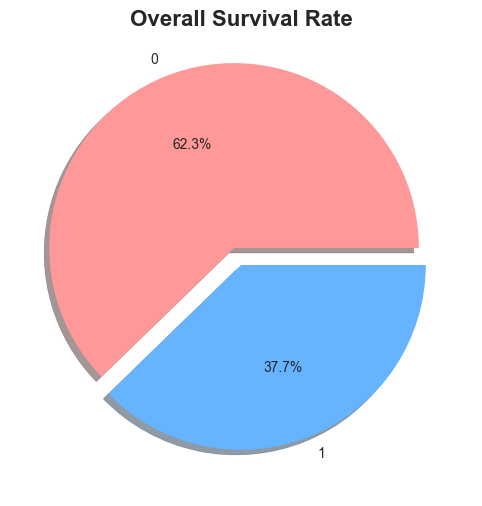

In [51]:
# Pie chart for overall survival rate
plt.figure(figsize=(8, 6))
full_df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', 
                                          colors=['#ff9999','#66b3ff'],
                                          explode=(0.1, 0),
                                          shadow=True)
plt.title('Overall Survival Rate', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.show()

2.2 Survival by Gender (Novel Visualization)

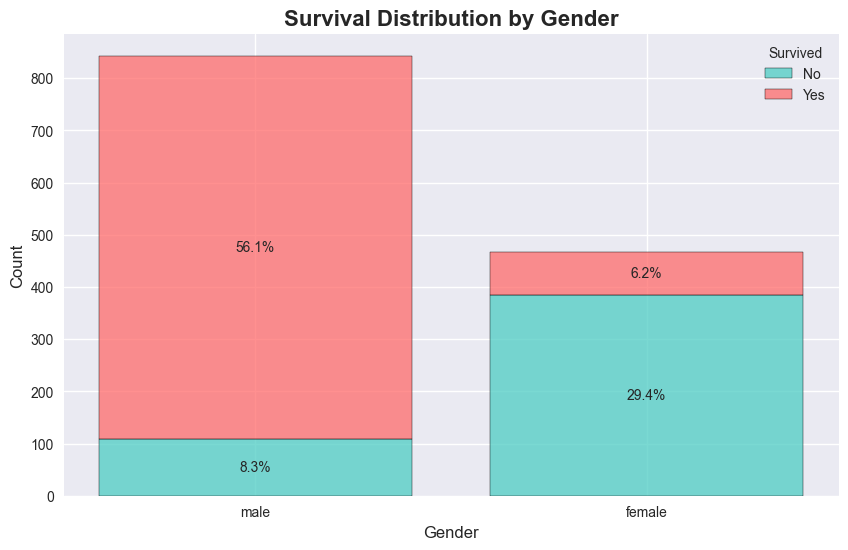

In [52]:
# Interactive stacked bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=full_df, x='Sex', hue='Survived', multiple='stack',
                 palette={0: '#ff6b6b', 1: '#4ecdc4'}, shrink=0.8)

# Add percentages on top of bars
total = len(full_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Survival Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

2.3 Age Distribution with Survival (Violin Plot)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_13868\1295354817.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




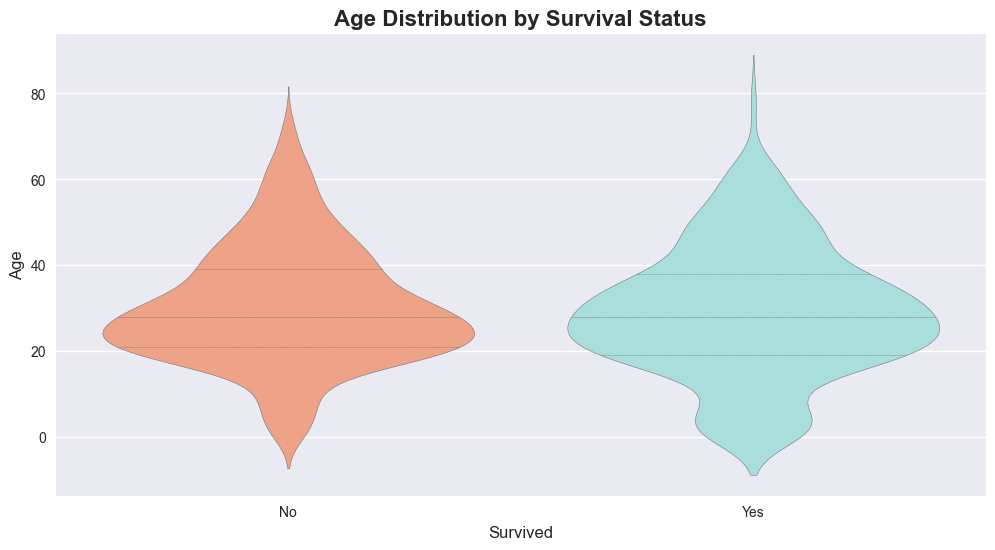

In [53]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Survived', y='Age', data=full_df, 
              palette={'0': '#ff9a76', '1': '#a0e7e5'}, 
              inner='quartile')
plt.title('Age Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

3. Novel Analysis Ideas

3.1 Family Survival Analysis

C:\Users\Alpha\AppData\Local\Temp\ipykernel_13868\1378097523.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




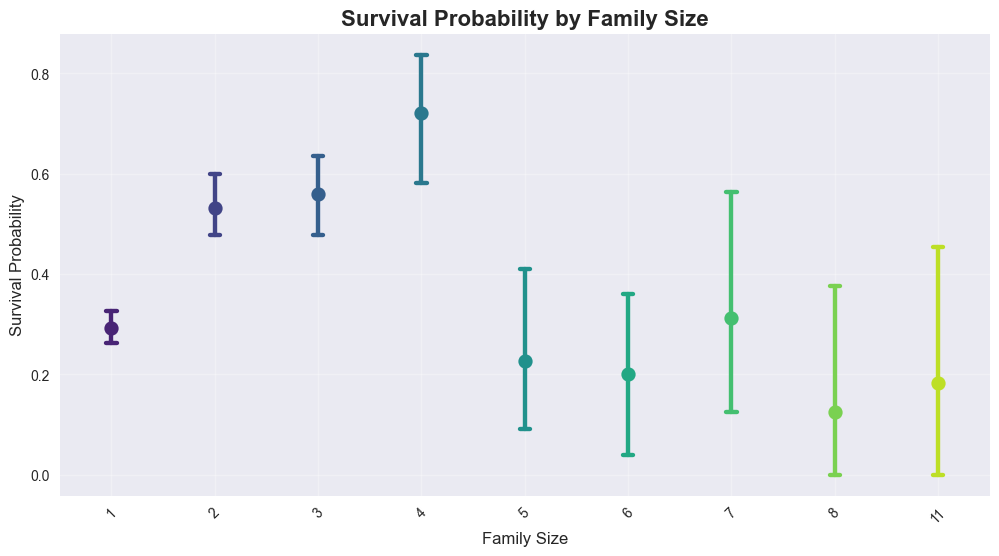

In [54]:
# Create family size feature
full_df['FamilySize'] = full_df['SibSp'] + full_df['Parch'] + 1

# Visualize family size impact
plt.figure(figsize=(12, 6))
sns.pointplot(x='FamilySize', y='Survived', data=full_df, 
             palette='viridis', capsize=0.1)
plt.title('Survival Probability by Family Size', fontsize=16, fontweight='bold')
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

3.2 Cabin Letter Analysis (New Feature)

C:\Users\Alpha\AppData\Local\Temp\ipykernel_13868\3152342985.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




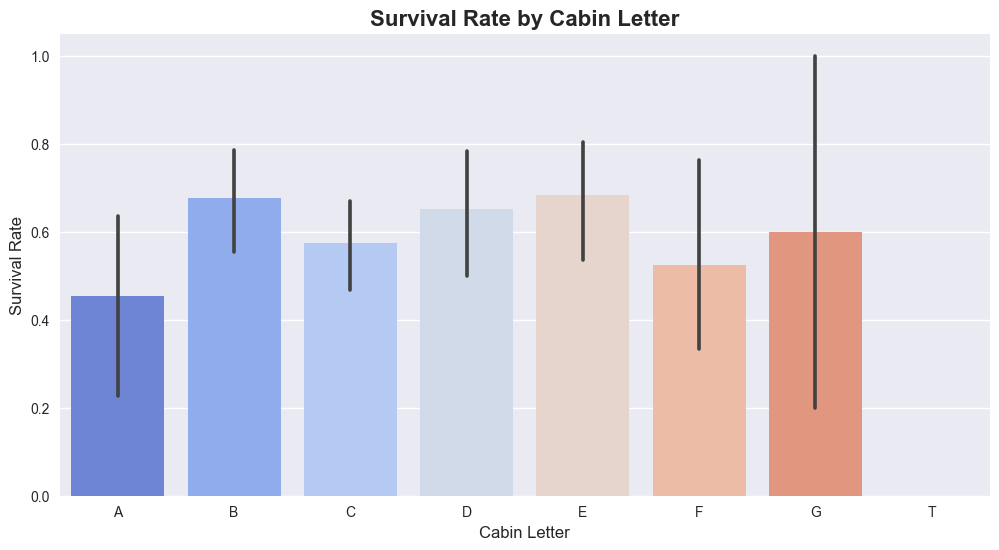

In [55]:
# Extract cabin letter (novel approach)
full_df['CabinLetter'] = full_df['Cabin'].str[0]

# Plot survival by cabin letter
plt.figure(figsize=(12, 6))
sns.barplot(x='CabinLetter', y='Survived', data=full_df, 
           palette='coolwarm', order=sorted(full_df['CabinLetter'].dropna().unique()))
plt.title('Survival Rate by Cabin Letter', fontsize=16, fontweight='bold')
plt.xlabel('Cabin Letter', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

3.3 Fare Quartile Analysis

<Figure size 1200x600 with 0 Axes>

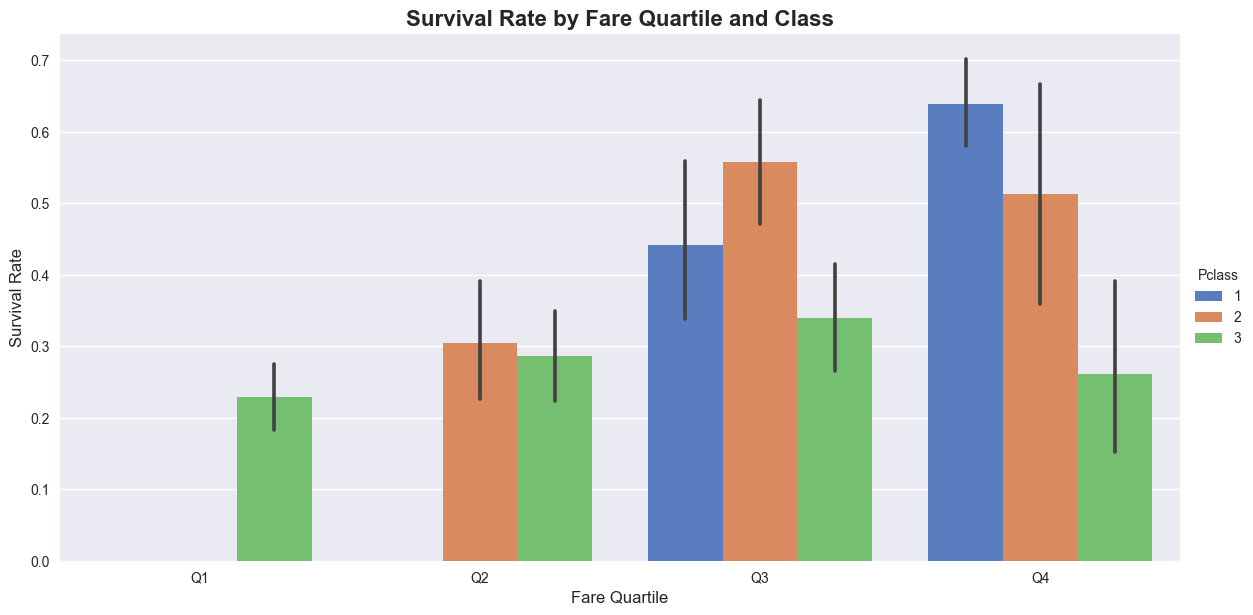

In [56]:
# Create fare quartiles
full_df['FareQuartile'] = pd.qcut(full_df['Fare'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Interactive plot
plt.figure(figsize=(12, 6))
sns.catplot(x='FareQuartile', y='Survived', hue='Pclass', 
           data=full_df, kind='bar', palette='muted',
           height=6, aspect=2)
plt.title('Survival Rate by Fare Quartile and Class', fontsize=16, fontweight='bold')
plt.xlabel('Fare Quartile', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

4. Advanced Visualization: Survival Correlation Heatmap

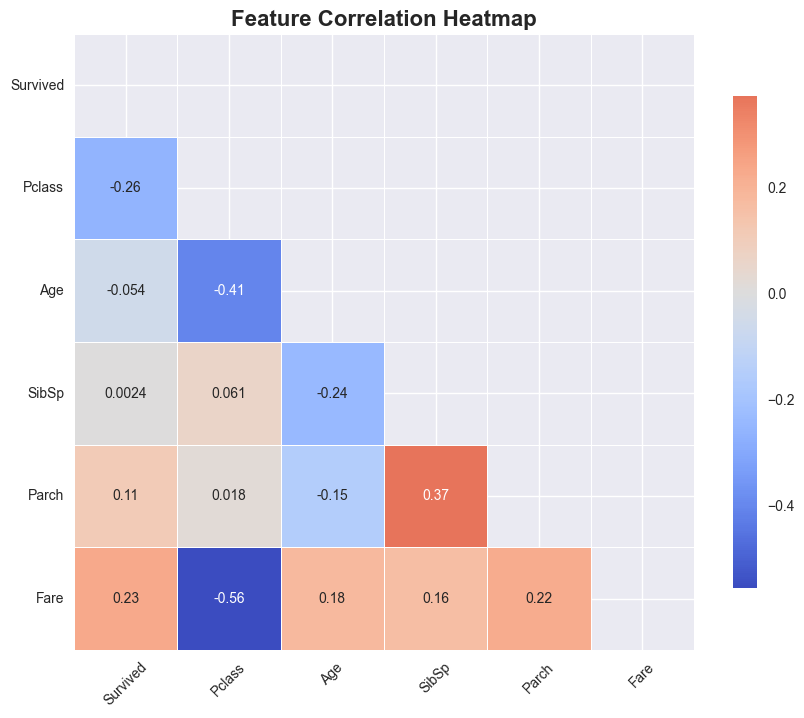

In [57]:
# Prepare correlation data
corr_df = full_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr_df = corr_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='coolwarm', 
           center=0, linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

5. Machine Learning Prediction (Bonus)

<>:6: SyntaxWarning:

invalid escape sequence '\.'

<>:6: SyntaxWarning:

invalid escape sequence '\.'

C:\Users\Alpha\AppData\Local\Temp\ipykernel_13868\999349017.py:6: SyntaxWarning:

invalid escape sequence '\.'



Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       159
           1       0.75      0.80      0.77       103

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



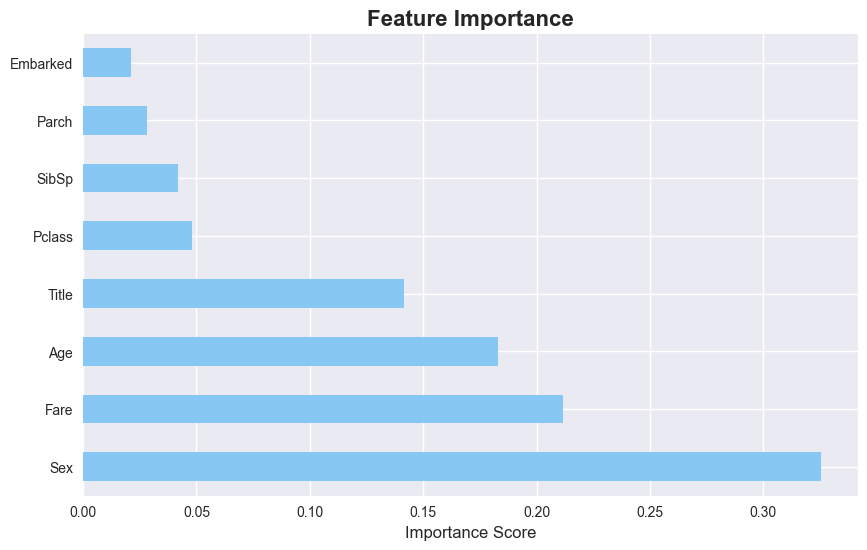

In [58]:
# Prepare data for modeling
from sklearn.preprocessing import LabelEncoder

# Feature engineering
df_model = full_df.copy()
df_model['Title'] = df_model['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_model['Title'] = df_model['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_model['Title'] = df_model['Title'].replace('Mlle', 'Miss')
df_model['Title'] = df_model['Title'].replace('Ms', 'Miss')
df_model['Title'] = df_model['Title'].replace('Mme', 'Mrs')

# Encode categorical features
label = LabelEncoder()
df_model['Sex'] = label.fit_transform(df_model['Sex'])
df_model['Embarked'] = label.fit_transform(df_model['Embarked'].fillna('S'))
df_model['Title'] = label.fit_transform(df_model['Title'])

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']
X = df_model[features].fillna(df_model[features].median())
y = df_model['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh', color='#86c7f3')
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.show()

6. Novel Analysis: Survival Probability by Age and Gender

C:\Users\Alpha\AppData\Local\Temp\ipykernel_13868\2973834049.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Alpha\AppData\Local\Temp\ipykernel_13868\2973834049.py:49: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



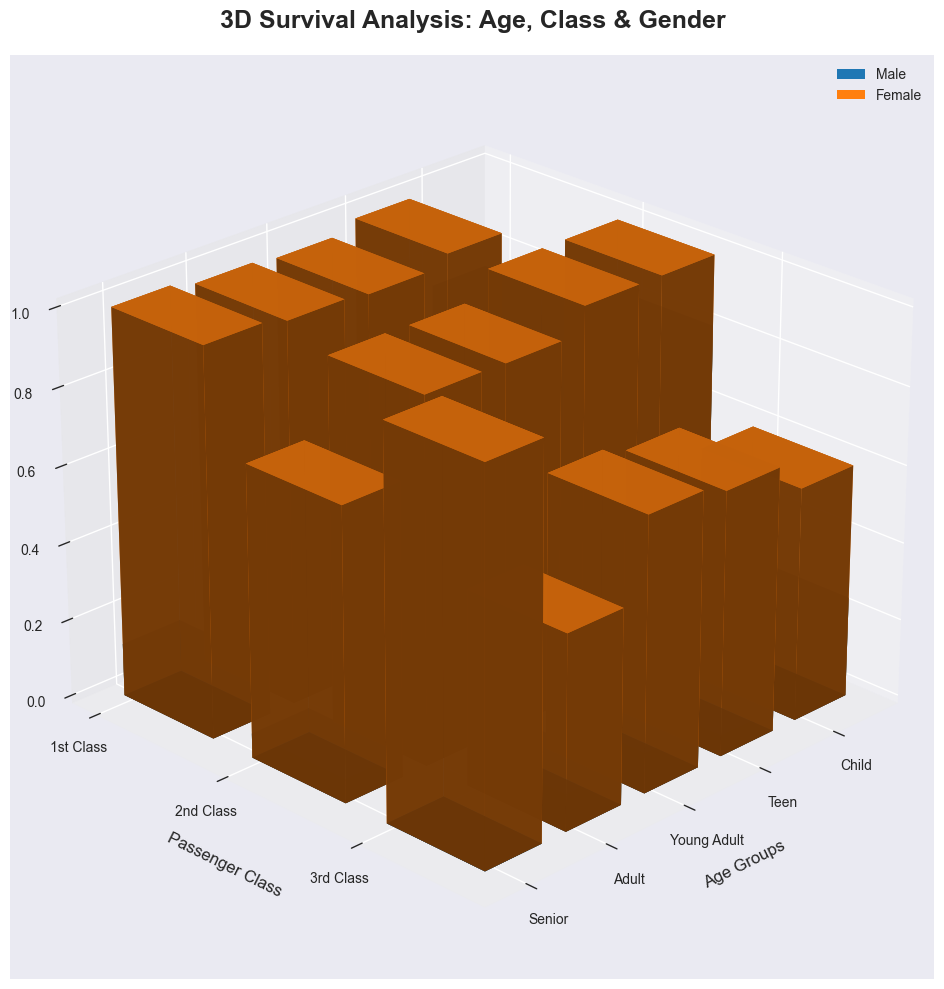

In [59]:
from matplotlib.patches import Patch

# Prepare data for 3D plot
age_bins = [0, 12, 18, 30, 50, 80]
class_labels = [1, 2, 3]
gender_labels = ['male', 'female']

# Create figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Color mapping
colors = {'male': '#1f77b4', 'female': '#ff7f0e'}

# Plot each combination
for gender in gender_labels:
    for pclass in class_labels:
        # Filter data
        subset = full_df[(full_df['Sex'] == gender) & (full_df['Pclass'] == pclass)]
        survival_rate = subset.groupby(pd.cut(subset['Age'], bins=age_bins))['Survived'].mean()
        
        # X, Y, Z values
        x = np.arange(len(age_bins)-1)
        y = [pclass] * len(x)
        z = survival_rate.values
        
        # Plot bars
        ax.bar3d(x, y, z, 
                dx=0.7, dy=0.7, dz=0, 
                color=colors[gender], alpha=0.8, shade=True)
        ax.bar3d(x, y, np.zeros(len(z)), 
                dx=0.7, dy=0.7, dz=z, 
                color=colors[gender], alpha=0.9, shade=True)

# Customize the view angle
ax.view_init(elev=25, azim=45)

# Labels and title
ax.set_xlabel('Age Groups', fontsize=12, labelpad=15)
ax.set_ylabel('Passenger Class', fontsize=12, labelpad=15)
ax.set_zlabel('Survival Rate', fontsize=12, labelpad=15)
ax.set_xticks(np.arange(len(age_bins)-1) + 0.5)
ax.set_xticklabels(['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['1st Class', '2nd Class', '3rd Class'])

plt.title('3D Survival Analysis: Age, Class & Gender', 
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()

# Add legend
legend_elements = [
    Patch(facecolor=colors['male'], label='Male'),
    Patch(facecolor=colors['female'], label='Female')
]
ax.legend(handles=legend_elements, loc='upper right')

7. Interactive Sunburst Chart (Plotly)

In [60]:
import plotly.express as px

# Create hierarchical data
full_df['AgeGroup'] = pd.cut(full_df['Age'], bins=[0,12,18,30,50,80], labels=['Child','Teen','Young Adult','Adult','Senior'])


fig = px.sunburst(
    hierarchical_df,
    path=['Pclass', 'Sex', 'AgeGroup'],
    values='Survived',
    color='Survived',
    color_continuous_scale='RdYlGn',
    range_color=[0, 1],
    title='<b>Hierarchical Survival Rates</b><br>Class → Gender → Age Group',
    width=800,
    height=800
)

fig.update_layout(
    title_font=dict(size=20, family='Arial', color='darkblue'),
    margin=dict(t=100, l=0, r=0, b=0)
)

fig.show()

8. Animated Scatter Plot (Age vs Fare with Survival)

In [61]:
import plotly.express as px

fig = px.scatter(
    full_df.dropna(subset=['Age', 'Fare']),
    x="Age",
    y="Fare",
    animation_frame="Pclass",
    color="Survived",
    color_discrete_map={0: '#ff6b6b', 1: '#4ecdc4'},
    size_max=15,
    hover_name="Name",
    hover_data=["Sex", "Embarked"],
    title="<b>Animated Age-Fare Relationship by Class</b>",
    width=900,
    height=600
)

fig.update_layout(
    title_font=dict(size=18, family='Arial'),
    xaxis_title="Age (Years)",
    yaxis_title="Fare (Currency)",
    legend_title="Survived"
)

fig.update_traces(
    marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

fig.show()

9. Radar Chart for Multi-Feature Comparison

In [62]:
import plotly.graph_objects as go

# Calculate average features by survival
radar_df = full_df.groupby('Survived')[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean().reset_index()

fig = go.Figure()

for survived in [0, 1]:
    fig.add_trace(go.Scatterpolar(
        r=radar_df[radar_df['Survived'] == survived].values[0][1:],
        theta=['Class', 'Age', 'Siblings', 'Parents', 'Fare'],
        fill='toself',
        name='Survived' if survived else 'Perished',
        line_color='#4ecdc4' if survived else '#ff6b6b'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(radar_df.max())]
        )),
    showlegend=True,
    title='<b>Radar Chart: Feature Comparison by Survival</b>',
    title_font=dict(size=18, family='Arial'),
    width=800,
    height=600
)

fig.show()

10. Enhanced Parallel Coordinates Plot

In [63]:
from plotly.subplots import make_subplots

# Create normalized features for parallel coordinates
parallel_df = full_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

fig = px.parallel_coordinates(
    parallel_df,
    color="Survived",
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={
        "Pclass": "Class",
        "Age": "Age",
        "SibSp": "Siblings",
        "Parch": "Parents",
        "Fare": "Fare",
        "Survived": "Survival"
    },
    title="<b>Parallel Coordinates: Multi-Dimensional Survival Patterns</b>"
)


fig.update_layout(
    title_font=dict(size=18, family='Arial'),
    margin=dict(l=80, r=80, t=80, b=80),
    width=1000,
    height=600
)

fig.show()

11. Interactive Heatmap with Dendrograms

In [64]:
import plotly.figure_factory as ff

# Prepare correlation data with more features
corr_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
corr_matrix = full_df[corr_features].corr()

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=np.around(corr_matrix.values, decimals=2),
    colorscale='Viridis',
    showscale=True,
    hoverongaps=True
)

fig.update_layout(
    title='<b>Interactive Correlation Heatmap with Dendrogram</b>',
    title_font=dict(size=18, family='Arial'),
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig.show()